#### Notes

* both schools are located in Portugal
* age of majority in Portugal is 18 (like in US)
* a score of 10 is the lowest possible passing grade

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [48]:
df_math = pd.read_csv("student-mat.csv")
df_math['pass'] = [1 if score >= 10 else 0 for score in df_math.G3]
df_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass'],
      dtype='object')

Text(0.5, 0, 'Weekend Alcohol Consumption')

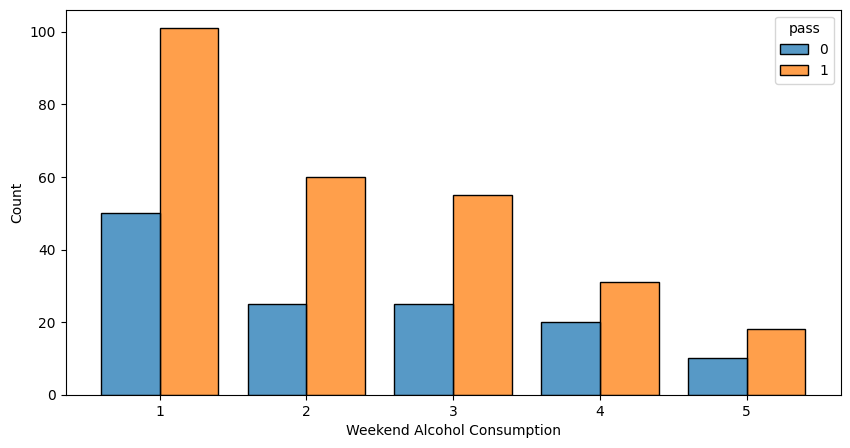

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(
  data=df_math,
  x='Walc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Weekend Alcohol Consumption')

Text(0.5, 0, 'Workday Alcohol Consumption')

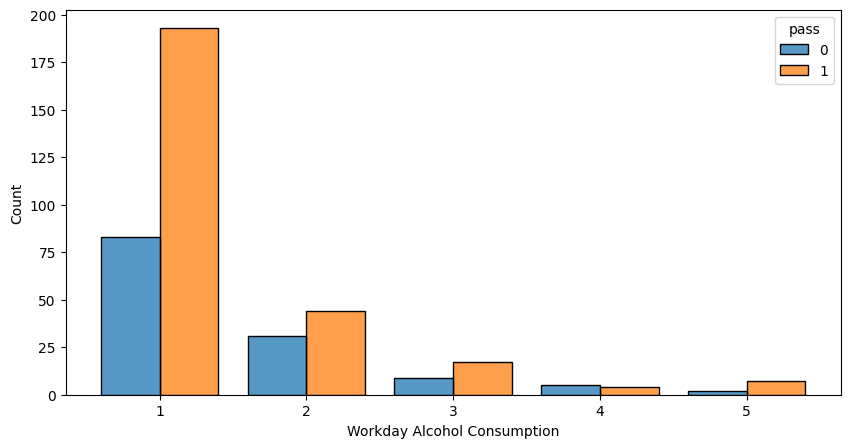

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(
  data=df_math,
  x='Dalc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Workday Alcohol Consumption')

Text(0.5, 0, 'Workday Alcohol Consumption')

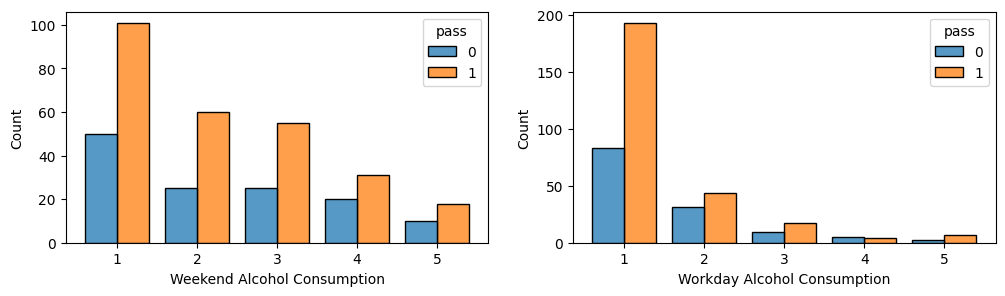

In [51]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(
  data=df_math,
  x='Walc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Weekend Alcohol Consumption')

plt.subplot(1, 2, 2)
sns.histplot(
  data=df_math,
  x='Dalc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Workday Alcohol Consumption')

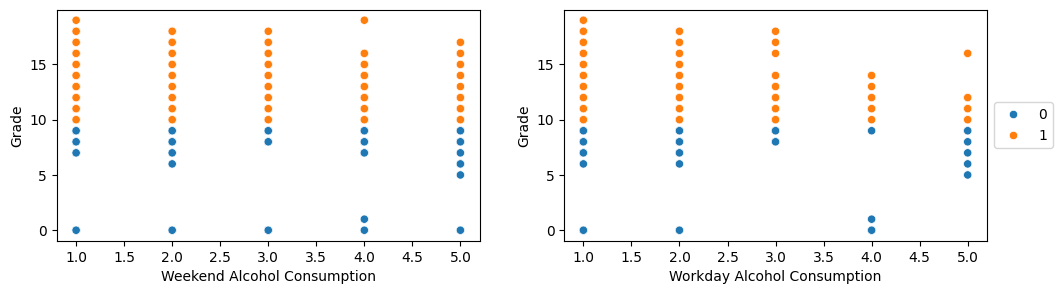

In [62]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(
  data=df,
  x='Walc',
  y='G3',
  hue='pass',
  legend=False
)
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Grade')

plt.subplot(1, 2, 2)
sns.scatterplot(
  data=df,
  x='Dalc',
  y='G3',
  hue='pass'
)
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Grade')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, 'Grade')

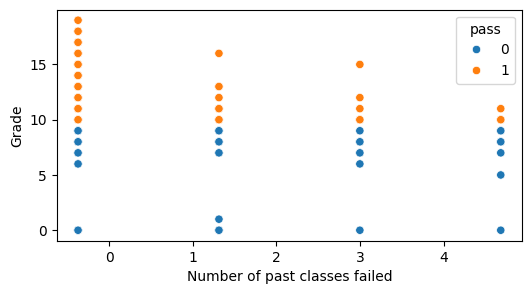

In [64]:
plt.figure(figsize=(6, 3))

sns.scatterplot(
  data=df,
  x='failures',
  y='G3',
  hue='pass'
)
plt.xlabel('Number of past classes failed')
plt.ylabel('Grade')

In [54]:
df = df_math.copy()

df.failures = (df.failures - df.failures.mean()) / df.failures.std() # number of past class failures
df.higher = [1 if e == 'yes' else 0 if e == 'no' else None for e in df.higher] # wants to take higher education
df.absences = (df.absences - df.absences.mean()) / df.absences.std() # number of school absences
df.goout = (df.goout - df.goout.mean()) / df.goout.std() # going out with friends

In [55]:
X = df[['failures', 'higher', 'absences', 'goout']]
y = df['pass']

lm = LogisticRegression(class_weight={0:0.65, 1:0.25, 2:0.05, 3:0.05,})

lm.fit(X, y)
y_pred = lm.predict(X)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p[0]))
display('recall = {}'.format(r[0]))
display('f-score = {}'.format(f[0]))

'predicted range: [0.00,1.00]'

'precision = 0.8019323671497585'

'recall = 0.6264150943396226'

'f-score = 0.7033898305084746'

In [56]:
df_por = pd.read_csv("student-por.csv")
df_por['pass'] = [1 if score >= 10 else 0 for score in df_por.G3]
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass'],
      dtype='object')

Text(0.5, 0, 'Weekend Alcohol Consumption')

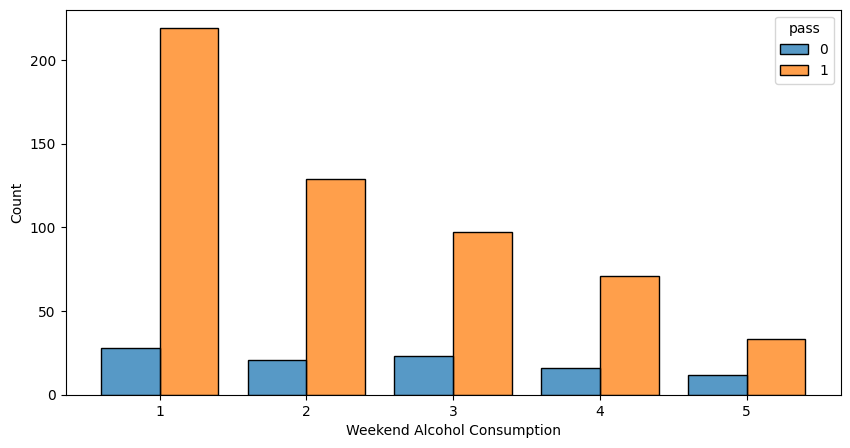

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(
  data=df_por,
  x='Walc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Weekend Alcohol Consumption')

Text(0.5, 0, 'Weekend Alcohol Consumption')

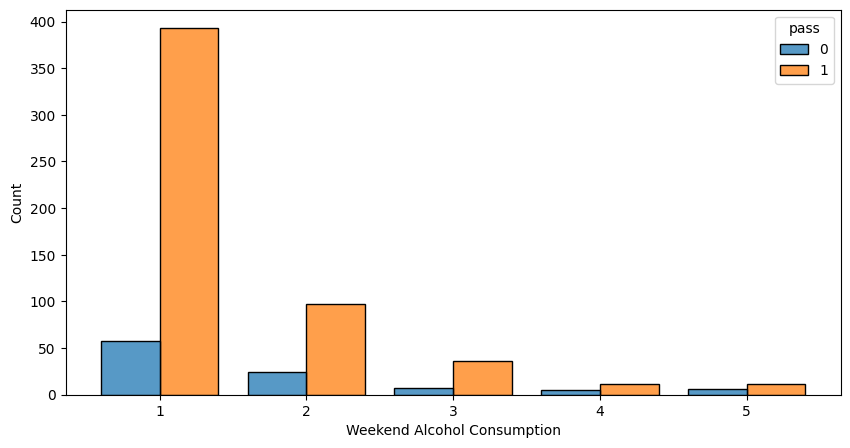

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(
  data=df_por,
  x='Dalc',
  hue='pass',
  shrink=0.8,
  discrete=True,
  multiple='dodge'
)
plt.xlabel('Weekend Alcohol Consumption')

In [59]:
df = df_por.copy()

df.failures = (df.failures - df.failures.mean()) / df.failures.std() # number of past class failures
df.higher = [1 if e == 'yes' else 0 if e == 'no' else None for e in df.higher] # wants to take higher education
df.absences = (df.absences - df.absences.mean()) / df.absences.std() # number of school absences
df.goout = (df.goout - df.goout.mean()) / df.goout.std() # going out with friends

In [60]:
X = df[['failures', 'higher', 'absences', 'goout']]
y = df['pass']

lm = LogisticRegression(class_weight={0:0.65, 1:0.25, 2:0.05, 3:0.05,})

lm.fit(X, y)
y_pred = lm.predict(X)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p[0]))
display('recall = {}'.format(r[0]))
display('f-score = {}'.format(f[0]))

'predicted range: [0.00,1.00]'

'precision = 0.8894645941278065'

'recall = 0.9380692167577414'

'f-score = 0.9131205673758865'